<a href="https://colab.research.google.com/github/Priya-Issar/Task-3/blob/main/Task_3_MIDAS_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Name - Priya Issar

#**Task - 3** NLP 
Problem Statement - Use a given dataset(Flipkart dataset) to build a model to predict the category using description.


##**1. Importing Libraries**

In [2]:
import numpy as np
import pandas as pd

## **2.Reading Data**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets_ML/flipkart_com_datamuch.csv')

In [4]:
df.head() #this will print first five records of the datasets

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [5]:
df.tail()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVEPPCZ42Y,1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19999,cb4fa87a874f715fff567f7b7b3be79c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88KN9ZDSGZKY,1499.0,999.0,"[""http://img6a.flixcart.com/image/sticker/z/k/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."


In [6]:
df.info()

#this will give list of all columns with their data types and number of not null values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [7]:
df = df [['description','product_category_tree']] #list slicing
#after this slicing , there will be only two columns in list that are description and product category

In [8]:
df.head()  # printing of list top 5 data after list slicing

,description,product_category_tree
0,Key Features of Alisha Solid Women's Cycling S...,"[""Clothing >> Women's Clothing >> Lingerie, Sl..."
1,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,"[""Furniture >> Living Room Furniture >> Sofa B..."
2,Key Features of AW Bellies Sandals Wedges Heel...,"[""Footwear >> Women's Footwear >> Ballerinas >..."
3,Key Features of Alisha Solid Women's Cycling S...,"[""Clothing >> Women's Clothing >> Lingerie, Sl..."
4,Specifications of Sicons All Purpose Arnica Do...,"[""Pet Supplies >> Grooming >> Skin & Coat Care..."


## **3.Preprocessing and Cleaning of Data**

In [12]:
df['product_category_tree'] = df.product_category_tree.apply(lambda x: x.replace('[','').replace(']', '').replace('"',''))


#lambda function argument = x
#in the expression part we are replacing the '[' and ']' and '"' symbol in ' '(to blank symbol).
#we are applying the above part on the product_category_tree column


In [20]:
x = df['product_category_tree'].apply(lambda x: x.split('>>'))

#split function will split the items of product_category_tree column whenever symbol ">>"" comes, return output in form of pandas series


In [21]:
x = x.apply(lambda x: x[0]) #retrun ist element of list to category part

#for example clothing>> women' clothing>> ....
#returning first element of series that is clothing , it is the **primary category**

In [15]:
type(x)

pandas.core.series.Series

In [16]:
df['category'] = x #insert values of x in category column

In [13]:
df.head()

,description,product_category_tree,category
0,Key Features of Alisha Solid Women's Cycling S...,"Clothing >> Women's Clothing >> Lingerie, Slee...",Clothing
1,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,Furniture >> Living Room Furniture >> Sofa Bed...,Furniture
2,Key Features of AW Bellies Sandals Wedges Heel...,Footwear >> Women's Footwear >> Ballerinas >> ...,Footwear
3,Key Features of Alisha Solid Women's Cycling S...,"Clothing >> Women's Clothing >> Lingerie, Slee...",Clothing
4,Specifications of Sicons All Purpose Arnica Do...,Pet Supplies >> Grooming >> Skin & Coat Care >...,Pet Supplies


In [22]:
counts = df.category.value_counts()  # this will count the cateogory and give result in descending order of items present in the series
print(counts)

Clothing                                               6198
Jewellery                                              3531
Footwear                                               1227
Mobiles & Accessories                                  1099
Automotive                                             1012
                                                       ... 
Zixtro Bug (Black, Backpack)                              1
Little Stars Girl's A-line Multicolor Dress               1
Fabpoppy Printed Women's Jumpsuit                         1
Boreal Roller Brush                                       1
Wellon Fittings set (16 pieces) for RO Water Pur...       1
Name: category, Length: 266, dtype: int64


In [31]:
most_frequent_category_names = counts[:10].index.tolist() #index.tolist()  will convert the index to list(datatype)
most_frequent_category_counts = counts[:10].values.tolist()




In [32]:
import plotly.graph_objects as go
fig = go.Figure(go.Bar(x=most_frequent_category_names, y=most_frequent_category_counts)) #plotting of bar graph
fig.show()


In [34]:
import spacy #help in information extraction
import nltk  #help in tokenization,parsing classification
nlp = spacy.load("en_core_web_sm")
def count_words(matrix):
    words = []
    words_freq = []
    words_vals = []
    for desc in matrix:
        doc = nlp(desc)
        for token in doc:
            if not token.is_stop:
                words.append(doc)
    f = nltk.FreqDist(words)
    for x, v in f.most_common(10):
        words_freq.append(x)
        words_vals.append(v)
    return words, words_vals, words_freq


In [36]:
words, words_vals, words_freq = count_words(df.category.values) #calling of count_words function

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. 

For generating word cloud in Python, modules needed are – matplotlib, pandas and wordcloud. 

## **4.Visualization of data**

In [37]:
from wordcloud import WordCloud


In [38]:
im = WordCloud(width=640, height=800).generate(",".join([i.text for i in words]))


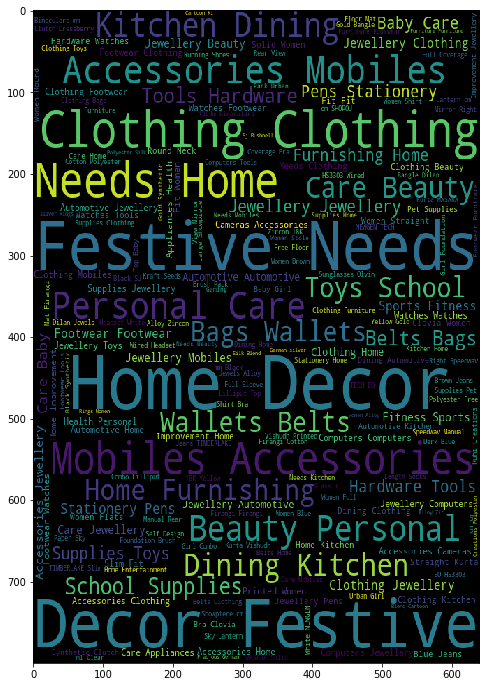

In [40]:
import matplotlib.pyplot as plt
f, a = plt.subplots(figsize=(8, 12))
a.imshow(im, interpolation='nearest', aspect='auto')

#The imshow() function in pyplot module of matplotlib library is used to display data as an image; i.e. on a 2D regular raster.

In order to use textual data for predictive modeling, the text must be parsed to remove certain words – this process is called tokenization. These words need to then be encoded as integers, or floating-point values, for use as inputs in machine learning algorithms. This process is called feature extraction (or vectorization).

Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text



The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is. 


In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import SVC
cv = CountVectorizer(stop_words='english') #this will return vector
tf = TfidfTransformer()

The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.



In [42]:
df.dropna(inplace=True) #use to remove rows and columns with null/NaN values
X = cv.fit_transform(df.description.values)


fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data.

In [43]:
X = tf.fit_transform(X)
y = df.category.values


In [44]:
#Split Data into training and testing 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


## **5.Training the algorithm**

In [45]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

How the algorithm is working on the given data

class - different types of product category

Predictor Feature - description of the product given

we have to predict the product category using predictive features that is description of the product

##**6. Evaluating the model**

In [46]:
classifier.score(X_test, y_test) #finding accuracy of model


0.8072

In [49]:
from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid = {'alpha':np.linspace(0, 1, 10), 'fit_prior':[True, False]}
grid = GridSearchCV(MultinomialNB(), param_grid=param_grid, cv=4)

In [50]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=4.

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.p

GridSearchCV(cv=4, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.9402

TextBlob is a Python library for processing textual data. It provides a simple API for common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction etc

In [62]:
from textblob import TextBlob

def product_category_identification(model, cv, tf, producto='sneakers'):
    blob = TextBlob(producto) #put value of product in blob
    item_category = blob
    #print(blob)
    vect = cv.transform([item_category.raw])
    idf = tf.transform(vect)
    item_category = model.predict(idf)[0]
    #print(TextBlob(item_category))
    blob = TextBlob(item_category)
    
    return blob.raw


Above function is used to identify the category of products

In [63]:
product_category_identification(model, cv ,tf)

'Footwear '

In [43]:
#test case-1
product_category_identification(model, cv ,tf, 'Laptop Acer')

'Computers '

In [44]:
#test case-2
product_category_identification(model, cv ,tf, 'track suit')

'Clothing '

In [45]:
#test case-3
product_category_identification(model, cv ,tf, 'Titan')

'Watches '

In [46]:
##test case-4
product_category_identification(model, cv ,tf,'First Choice Cotton Embroidered Diwan Set')

'Home Furnishing '

In [47]:
#test case-5
product_category_identification(model, cv ,tf,'Taj Pearl Alloy Cuff')

'Jewellery '